In [1]:
%matplotlib inline

from __future__ import division

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

import matplotlib.colors as colors
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

In [119]:
log_path = "logs_635768773586048450"

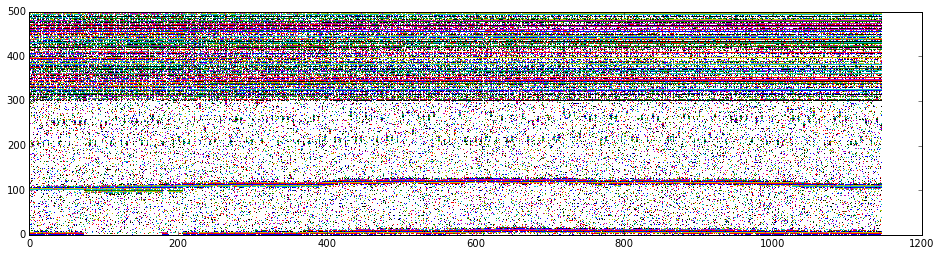

In [124]:
df = pd.read_csv("%s/output.csv" % log_path, header=None)
dfs = df.gt(0).applymap(lambda x: 1.0 if x else None)

duration = 10000

plt.figure(figsize=(16, 4))
for i in dfs.columns:
    x = dfs.index[:duration]
    y = (dfs[i] * i)[:duration]
    s = dfs[i][:duration].sum()
    plt.plot(x, y, ",")

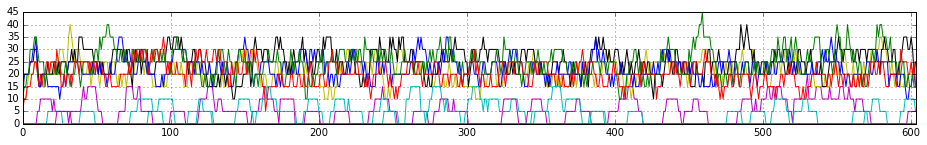

In [83]:
df = pd.read_csv("%s/rate.csv" % log_path, header=None)
df.T[1:].T.plot(style="-", legend=False, figsize=(16, 2))

In [6]:
w = df.values[0]

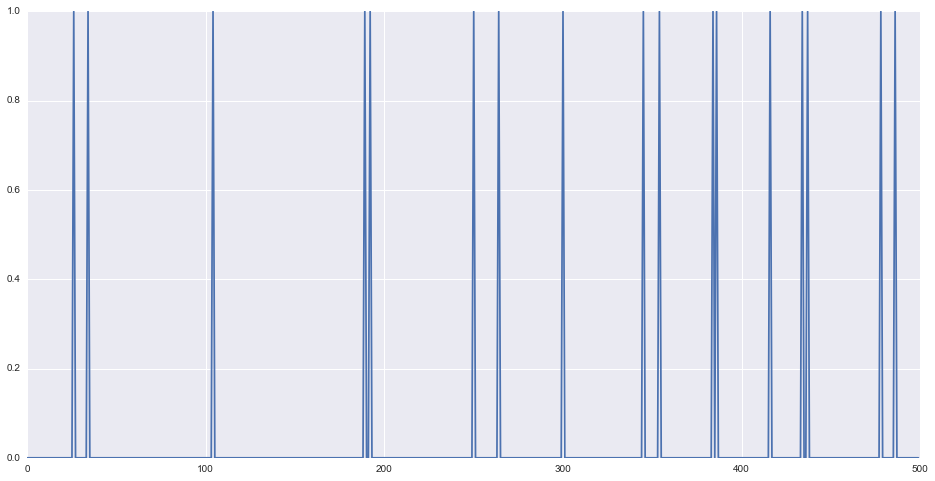

In [9]:
plt.figure(figsize=(16, 8))
_ = plt.hist(w, 250, lw=0)

In [8]:
plt.figure(figsize=(16, 16))
plt.imshow(np.reshape(w, (300, 200)), interpolation='none', cmap='RdBu', aspect=1, norm=colors.Normalize())
plt.grid(False)
plt.colorbar()

ValueError: total size of new array must be unchanged

ValueError: max() arg is an empty sequence

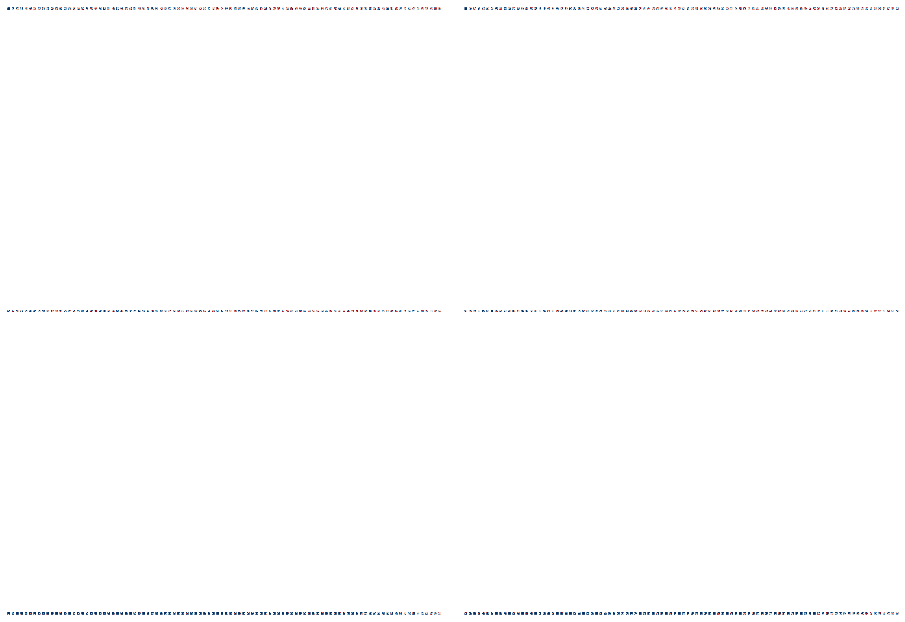

In [230]:
# there are 60,000 synapses
# 10,000 for each input layer, going to each output layer (x2)
# of those 10,000 are 100 outgoing from each input neuron

layer_count = 6
layer_size = 10000
input_layer_count = 100
output_layer_count = 100

fig = plt.figure(figsize=(16, 16))

outer_gs = gridspec.GridSpec(3, 2, wspace=0.0, hspace=0.0)

for i in xrange(layer_count): # iterate input layers
    inner_gs = gridspec.GridSpecFromSubplotSpec(100, 100,
        subplot_spec=outer_gs[i], wspace=0.0, hspace=0.0)

    layer_start = i * layer_size
    layer_end = layer_start + layer_size
    layer_w = w[layer_start:layer_end]

    for j in range(0, input_layer_count):
        neuron_start = j * output_layer_count
        neuron_end = neuron_start + output_layer_count
        neuron_w = np.reshape(layer_w[neuron_start:neuron_end], (10, 10))
        
        ax = plt.Subplot(fig, inner_gs[j])
        ax.imshow(neuron_w, interpolation='none', cmap='RdBu', aspect='equal', norm=colors.Normalize(vmin=-15.0, vmax=15.0))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(False)
        fig.add_subplot(ax)

plt.tight_layout()
plt.show()

# Animation

In [55]:
log_path = "logs_635766282941172870"

dfI = pd.read_csv("%s/rate.csv" % log_path, header=None)
# dfO = pd.read_csv("%s/output.csv" % log_path, header=None)

In [58]:
def animate(data):
    def inner(nframe):
        plt.cla()
        plt.plot(data.columns.values, data.ix[nframe])
    return inner

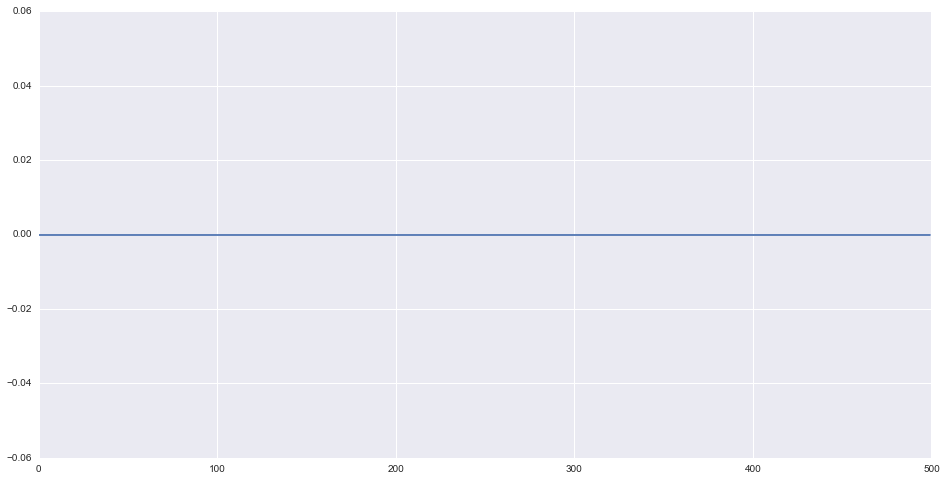

In [59]:
fig = plt.figure(figsize=(16, 8))  
anim = animation.FuncAnimation(fig, animate(dfI), frames=len(dfI.values))
anim.save('input.gif', writer='imagemagick', fps=1);

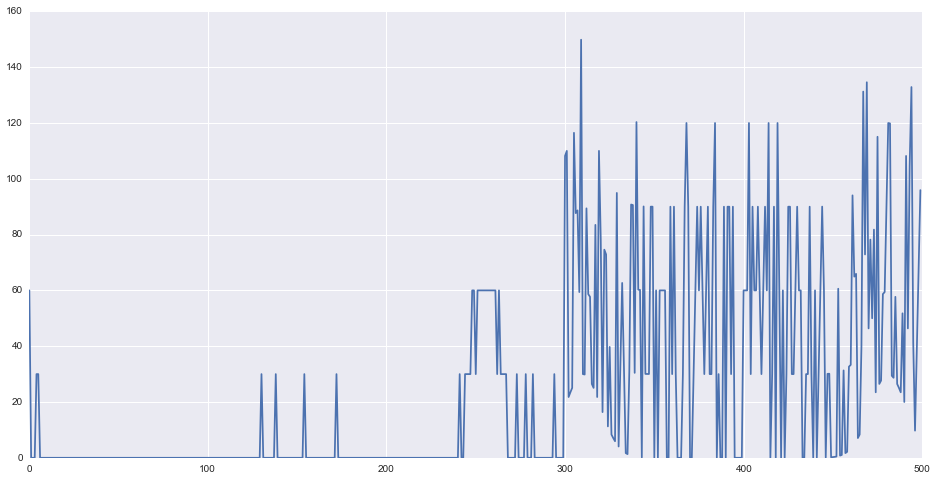

In [228]:
fig = plt.figure(figsize=(16, 8))  
anim = animation.FuncAnimation(fig, animate(dfO), frames=100)
anim.save('output.gif', writer='imagemagick', fps=1);